# Contextualização

A qualidade de um vinho é influenciada por diversas características físico-químicas que podem ser medidas em laboratório, como acidez, teor alcoólico, pH e concentração de açúcar. Com o avanço das técnicas de ciência de dados, tornou-se possível utilizar essas variáveis para prever a qualidade do vinho de forma automatizada, auxiliando na padronização do produto e em decisões de produção.

Este projeto tem como objetivo aplicar regressão linear múltipla para prever a qualidade do vinho com base em suas propriedades químicas. Para isso, utilizaremos o Wine Quality Dataset, disponibilizado pelo repositório da UCI Machine Learning, que contém informações sobre amostras de vinho tinto e branco, avaliadas em laboratório e por especialistas.

Através de uma abordagem prática, o projeto seguirá as principais etapas de um fluxo de ciência de dados: exploração, preparação, modelagem e avaliação. A regressão linear múltipla será empregada como modelo preditivo, e serão avaliadas métricas como coeficiente de determinação (R²), erro médio absoluto (MAE) e raiz do erro quadrático médio (RMSE) para verificar a eficácia do modelo.

## Sobre a base de dados utilizada

O conjunto de dados utilizado neste projeto é o Wine Quality Dataset, disponibilizado pela UCI Machine Learning Repository. Ele contém dados físico-químicos de amostras de vinhos portugueses, divididos em duas categorias: vinho tinto e vinho branco. Cada amostra foi analisada em laboratório e avaliada sensorialmente por provadores especializados, resultando em uma nota de qualidade que vai de 0 a 10.

Para este projeto, será utilizado o subconjunto referente ao vinho tinto, composto por 1.599 registros e 12 variáveis, sendo 11 variáveis independentes (características químicas) e 1 variável dependente (nota de qualidade).



A base está disponível publicamente no link:

[Wine Quality – UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)

<h3 class="" data-start="809" data-end="854">As variáveis presentes no dataset são:</h3>
<div class="overflow-x-auto contain-inline-size">
<table data-start="856" data-end="1949">
<thead data-start="856" data-end="935">
<tr data-start="856" data-end="935">
<th data-start="856" data-end="890">Variável</th>
<th data-start="890" data-end="935">Descrição</th>
</tr>
</thead>
<tbody data-start="1014" data-end="1949">
<tr data-start="1014" data-end="1091">
<td><code data-start="1016" data-end="1031">fixed acidity</code></td>
<td>Acidez fixa</td>
</tr>
<tr data-start="1092" data-end="1169">
<td><code data-start="1094" data-end="1112">volatile acidity</code></td>
<td>Acidez volátil</td>
</tr>
<tr data-start="1170" data-end="1247">
<td><code data-start="1172" data-end="1185">citric acid</code></td>
<td>Ácido cítrico</td>
</tr>
<tr data-start="1248" data-end="1325">
<td><code data-start="1250" data-end="1266">residual sugar</code></td>
<td>Açúcar residual</td>
</tr>
<tr data-start="1326" data-end="1403">
<td><code data-start="1328" data-end="1339">chlorides</code></td>
<td>Cloretos</td>
</tr>
<tr data-start="1404" data-end="1481">
<td><code data-start="1406" data-end="1427">free sulfur dioxide</code></td>
<td>Dióxido de enxofre livre</td>
</tr>
<tr data-start="1482" data-end="1559">
<td><code data-start="1484" data-end="1506">total sulfur dioxide</code></td>
<td>Dióxido de enxofre total</td>
</tr>
<tr data-start="1560" data-end="1637">
<td><code data-start="1562" data-end="1571">density</code></td>
<td>Densidade</td>
</tr>
<tr data-start="1638" data-end="1715">
<td><code data-start="1640" data-end="1644">pH</code></td>
<td>pH</td>
</tr>
<tr data-start="1716" data-end="1793">
<td><code data-start="1718" data-end="1729">sulphates</code></td>
<td>Sulfatos</td>
</tr>
<tr data-start="1794" data-end="1871">
<td><code data-start="1796" data-end="1805">alcohol</code></td>
<td>Teor alcoólico</td>
</tr>
<tr data-start="1872" data-end="1949">
<td><code data-start="1874" data-end="1883">quality</code></td>
<td>Qualidade do vinho (variável alvo)</td>
</tr>
</tbody>
</table>
</div>
<p data-start="1951" data-end="2165"></p>
<p class="" data-start="1951" data-end="2165">A variável <strong data-start="1962" data-end="1975"><code data-start="1964" data-end="1973">quality</code></strong> é a <strong data-start="1980" data-end="2003">variável dependente</strong> que desejamos prever a partir das demais. Trata-se de uma variável discreta, avaliada em uma escala de 0 a 10, embora a maioria dos registros esteja entre 3 e 8.</p>

# Preparando o ambiente e a base de dados

Instalar/Importar as bibliotecas necessárias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Instalar a biblioteca ucimlrepo

In [3]:
pip install ucimlrepo

Importar o dataset no código

In [4]:
# Importar função da biblioteca
from ucimlrepo import fetch_ucirepo

# Baixar o dataset Wine Quality (ID 186 na UCI)
wine_quality = fetch_ucirepo(id=186)

# Dados como DataFrames do pandas
X = wine_quality.data.features    # Variáveis independentes
y = wine_quality.data.targets     # Variável dependente (qualidade)

# Visualizar metadados e variáveis (opcional)
print(wine_quality.metadata)
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

Juntando X e y num único DataFrame

In [5]:
# Junta os dados e renomeia a variável alvo como 'quality'
df = X.copy()
df['quality'] = y

# Visualizar as primeiras linhas
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Configuração de estilo para gráficos

In [6]:
sns.set(style="whitegrid")

# Análise exploratória

## Distribuição das variáveis numéricas

Plotar histogramas para todas as variáveis

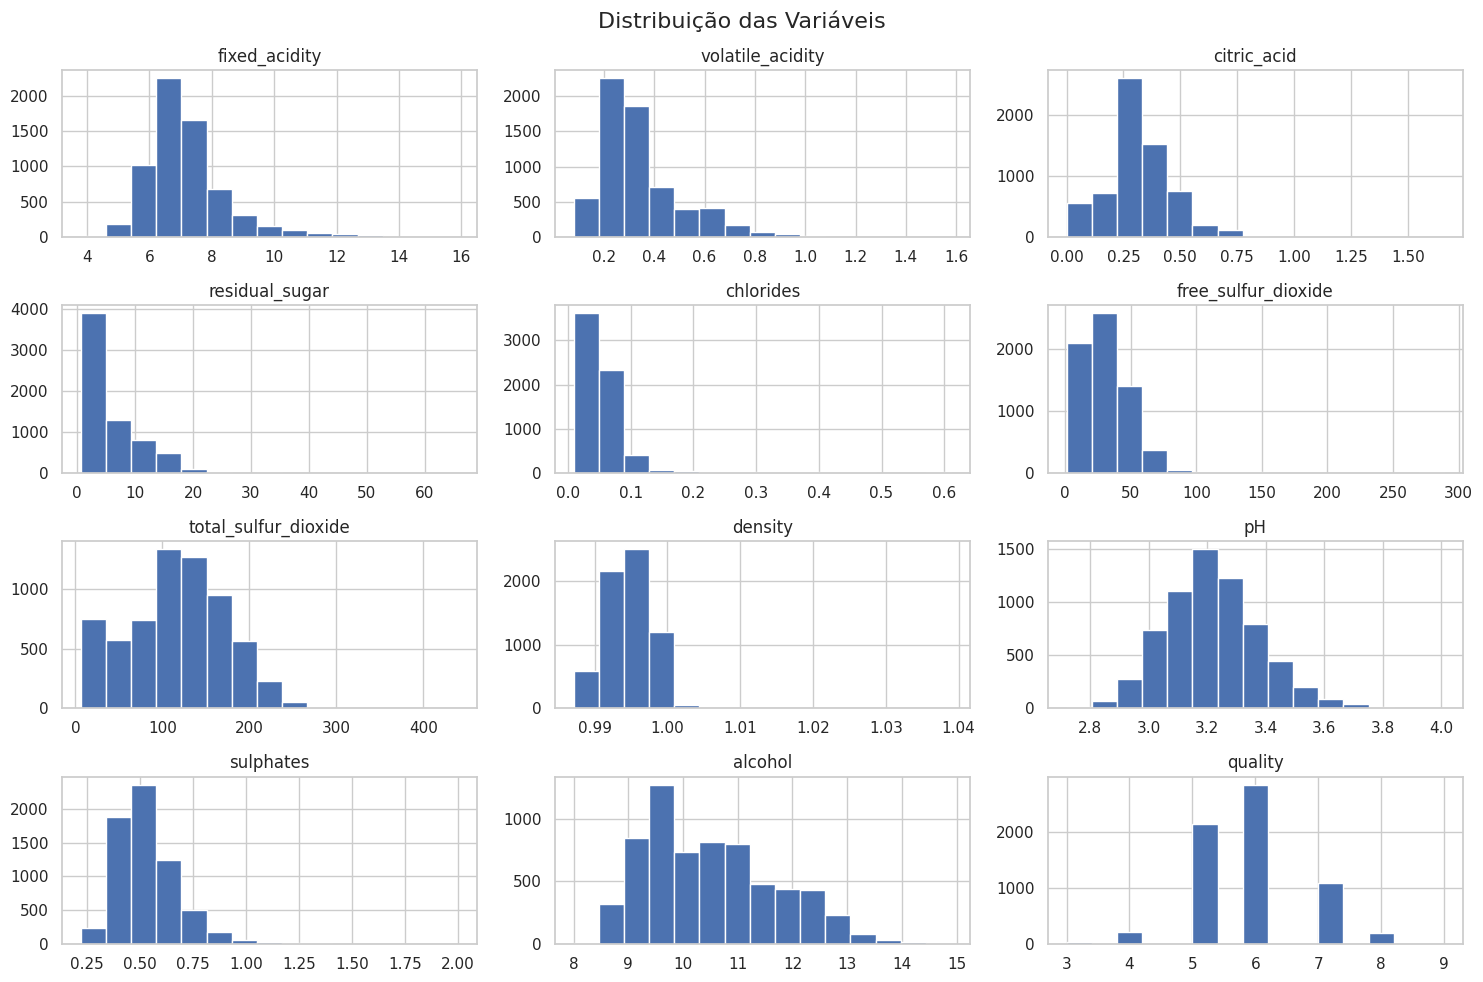

In [7]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Distribuição das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

## Verificar correlação entre variáveis

Matriz de correlação

In [8]:
correlation_matrix = df.corr()

Mapa de calor (heatmap) das correlações

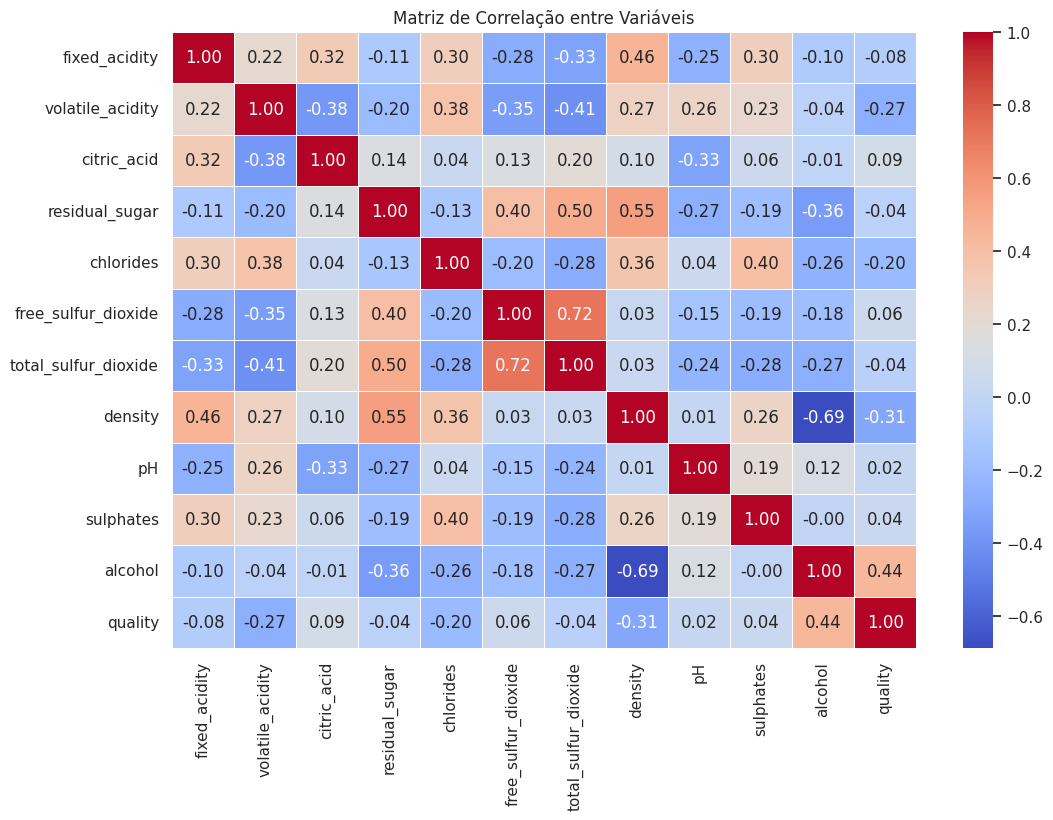

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

## Relação entre as variáveis mais correlacionadas e a qualidade

Relação entre alcool e qualidade

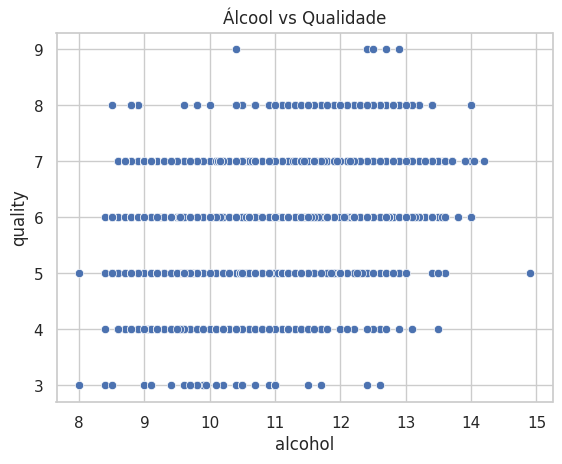

In [10]:
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title("Álcool vs Qualidade")
plt.show()

Relação entre sulfatos e qualidade

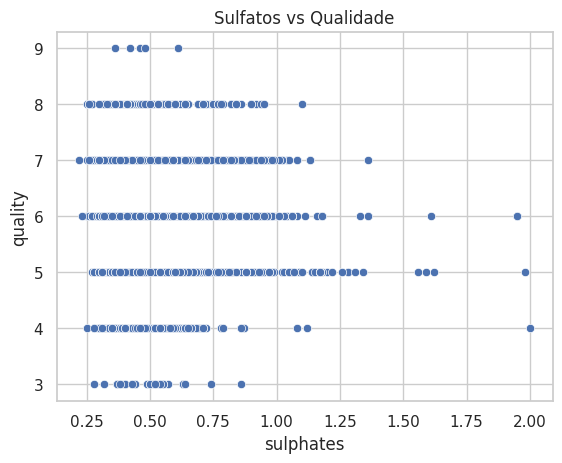

In [11]:
sns.scatterplot(x='sulphates', y='quality', data=df)
plt.title("Sulfatos vs Qualidade")
plt.show()

Relação entre Acidez Volátil vs Qualidade

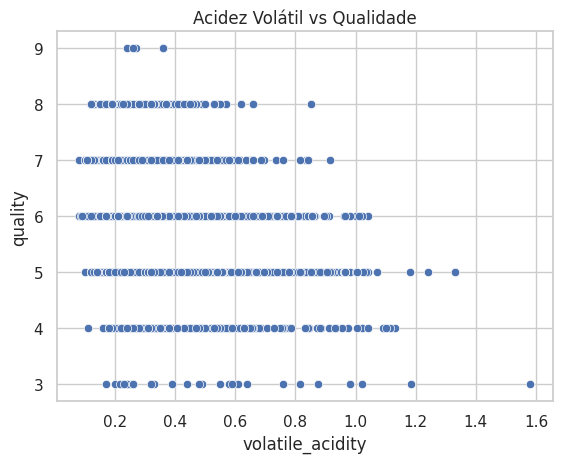

In [12]:
sns.scatterplot(x='volatile_acidity', y='quality', data=df)
plt.title("Acidez Volátil vs Qualidade")
plt.show()

# Pré-processamento e Regressão Linear Múltipla

Separar as variáveis independentes (X) e a dependente (y)

In [13]:
# X = todas as colunas, exceto 'quality'
X = df.drop('quality', axis=1)

# y = coluna alvo
y = df['quality']

Dividir os dados em treino e teste

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Treinar o modelo de Regressão Linear

In [15]:
from sklearn.linear_model import LinearRegression

# Instanciando o modelo
modelo = LinearRegression()

# Treinando
modelo.fit(X_train, y_train)

LinearRegression()

Verificar os coeficientes da regressão

In [16]:
# Coeficientes de cada variável
coeficientes = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": modelo.coef_
})

print(coeficientes)

                Variável  Coeficiente
0          fixed_acidity     0.078975
1       volatile_acidity    -1.350775
2            citric_acid    -0.143778
3         residual_sugar     0.045949
4              chlorides    -0.332842
5    free_sulfur_dioxide     0.007025
6   total_sulfur_dioxide    -0.002663
7                density   -58.945052
8                     pH     0.482842
9              sulphates     0.808360
10               alcohol     0.270669


Fazer previsões e avaliar o modelo

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.57
RMSE: 0.74
R²: 0.26


# Avaliação Gráfica do Modelo

Gráfico: Valores Reais vs. Previstos

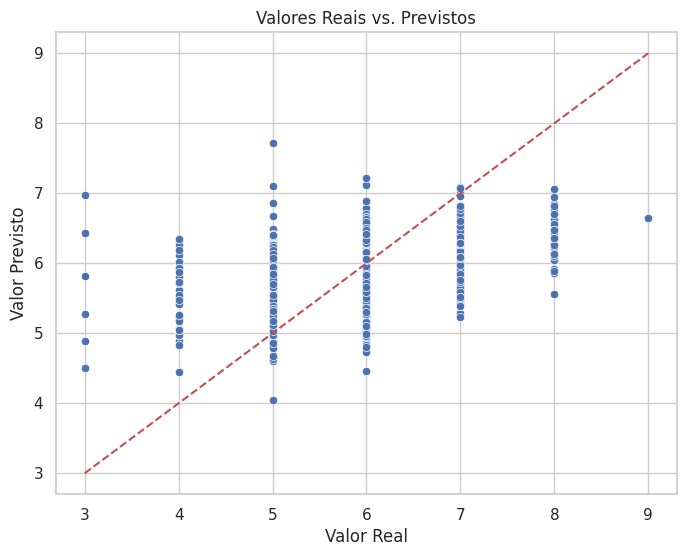

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Linha ideal
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Valores Reais vs. Previstos")
plt.show()

Gráfico de Resíduos

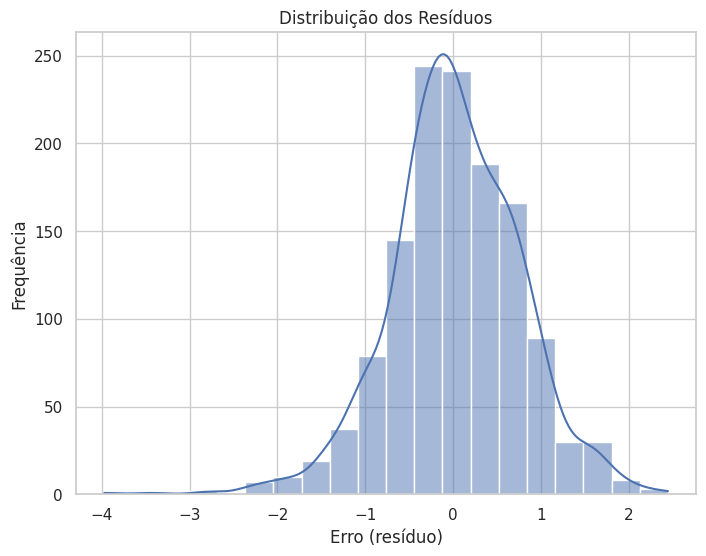

In [19]:
residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, bins=20)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro (resíduo)")
plt.ylabel("Frequência")
plt.show()

# Conclusão e Interpretação dos Resultados

## Avaliação Quantitativa

Com os seguintes resultados obtidos a partir do modelo de regressão linear múltipla:

- MAE (Erro Médio Absoluto): 0.57

- RMSE (Raiz do Erro Quadrático Médio): 0.74

- R² (Coeficiente de Determinação): 0.26

Temos a seguinte interpretação:

- O MAE de 0.57 indica que, em média, o modelo erra cerca de meio ponto na escala de qualidade dos vinhos (que vai de 0 a 10). Esse erro é relativamente pequeno, o que mostra que as previsões estão razoavelmente próximas dos valores reais.

- O RMSE de 0.74 reforça essa ideia, mas também mostra que há alguns erros um pouco maiores — como o RMSE dá mais peso a grandes erros, ele tende a ser maior que o MAE.

- O R² de 0.26 significa que o modelo explica apenas 26% da variabilidade da variável quality. Isso é um valor baixo, o que sugere que o modelo linear não está conseguindo capturar toda a complexidade do problema. Em outras palavras, 74% da variação na qualidade dos vinhos permanece sem explicação pelo modelo.

Esse desempenho modesto é esperado, pois a qualidade do vinho é uma variável sensorial e subjetiva, que pode depender de fatores que não estão presentes no conjunto de dados (como aroma, aparência, gosto, etc.).

## Avaliação Gráfica

**Gráfico: Valores Reais vs. Previstos**

Neste gráfico, cada ponto representa uma amostra do conjunto de teste. A linha vermelha tracejada indica o cenário ideal em que os valores previstos seriam exatamente iguais aos valores reais.

Podemos observar que:

- A maioria dos pontos está próxima da linha, indicando que o modelo consegue prever razoavelmente bem em torno da média.

- No entanto, há uma tendência do modelo em subestimar valores altos e superestimar valores baixos, o que indica uma certa regressão à média — um comportamento comum em modelos lineares quando a variável dependente tem uma distribuição estreita.

**Gráfico: Distribuição dos Resíduos**

O gráfico mostra a distribuição dos erros de predição (resíduos = valor real − valor previsto). A curva azul representa uma distribuição de densidade kernel (KDE).

Observações:

- A distribuição é aproximadamente simétrica e centrada em zero, o que é um bom indicativo de que o modelo não está cometendo erros sistemáticos (tendenciosos).
- No entanto, há uma leve assimetria negativa e alguns valores extremos à esquerda (resíduos negativos maiores), o que reforça a tendência do modelo em superestimar a qualidade em alguns casos.

## Interpretação Final

Neste projeto, aplicamos regressão linear múltipla para prever a qualidade de vinhos tintos com base em suas características físico-químicas. Após o processo de preparação, modelagem e avaliação, obtivemos os seguintes resultados:

- MAE (Erro Médio Absoluto): 0.57
- RMSE (Raiz do Erro Quadrático Médio): 0.74
- R² (Coeficiente de Determinação): 0.26

Esses valores indicam que o modelo consegue prever a qualidade dos vinhos com um erro médio de aproximadamente meio ponto numa escala de 0 a 10, mas sua capacidade explicativa ainda é limitada: apenas 26% da variabilidade da qualidade é explicada pelas variáveis do modelo. Ou seja, 74% ainda depende de fatores não capturados pelos dados, como aspectos sensoriais subjetivos (aroma, gosto, aparência, etc.).
</br></br>

**Avaliação Gráfica**

O gráfico de valores reais vs. previstos mostrou que o modelo tende a concentrar as previsões em torno da média, errando mais frequentemente nos extremos da escala (3, 8 e 9). Isso indica uma tendência comum em modelos lineares, chamada de regressão à média.

Já a distribuição dos resíduos apresentou um formato aproximadamente simétrico e centrado em zero, sugerindo que o modelo não é tendencioso. Ainda assim, a leve cauda à esquerda mostra que há casos em que o modelo superestima a qualidade real.

## Conclusão

Apesar das limitações, o modelo de regressão linear múltipla se mostrou uma boa ferramenta inicial para analisar a relação entre as variáveis físico-químicas e a qualidade do vinho. Ele fornece uma visão interpretável sobre quais atributos mais influenciam a nota final e estabelece uma base sólida para modelos mais sofisticados.

# Próximos Passos

Para melhorar o desempenho preditivo, recomenda-se explorar:
- Modelos não lineares como Random Forest, Gradient Boosting ou Redes Neurais.
- Engenharia de atributos, criando novas variáveis combinadas ou transformadas.
- Técnicas de regularização, como Ridge e Lasso, para evitar multicolinearidade e overfitting.
- Avaliar se a normalização ou padronização das variáveis pode impactar modelos mais sensíveis à escala.